<a href="https://colab.research.google.com/github/soumikmodak/Projects/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")


11493376/11490434 [==============================] - 0s 0us/step


the image is of 2


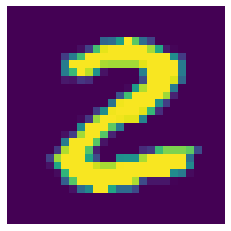

In [ ]:
plt.imshow(x_train[25])
plt.axis('off')

print("the image is of", y_train[25])

Preprocessing data 


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0
print(x_test[4].shape)
x_train=x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

(28, 28)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 10s - loss: 0.1310 - accuracy: 0.9603
Epoch 2/10
1875/1875 - 10s - loss: 0.0421 - accuracy: 0.9876
Epoch 3/10
1875/1875 - 9s - loss: 0.0279 - accuracy: 0.9911
Epoch 4/10
1875/1875 - 10s - loss: 0.0204 - accuracy: 0.9934
Epoch 5/10
1875/1875 - 9s - loss: 0.0161 - accuracy: 0.9948
Epoch 6/10
1875/1875 - 9s - loss: 0.0114 - accuracy: 0.9963
Epoch 7/10
1875/1875 - 9s - loss: 0.0099 - accuracy: 0.9967
Epoch 8/10
1875/1875 - 9s - loss: 0.0078 - accuracy: 0.9976
Epoch 9/10
1875/1875 - 9s - loss: 0.0073 - accuracy: 0.9977
Epoch 10/10
1875/1875 - 9s - loss: 0.0054 - accuracy: 0.9984


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("test accuracy ="+str("{:.2f}".format( test_acc*100.0)) + "%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9922
test accuracy =99.22%


**Predict your  image**


In [ ]:
classification=model.predict(x_test)

In [ ]:
print(classification[0])

[7.1111889e-16 5.2554420e-14 2.0413458e-12 1.8597942e-12 3.3425113e-11
 6.5847071e-16 9.7363087e-18 1.0000000e+00 4.4827475e-12 5.1824189e-10]


In [ ]:
for i in range(1,10):
  print("predicted label="+str(np.argmax(classification[i]))+" original label was="+str(y_test[i]))
  time.sleep(2)


predicted label=2 original label was=2
predicted label=1 original label was=1
predicted label=0 original label was=0
predicted label=4 original label was=4
predicted label=1 original label was=1
predicted label=4 original label was=4
predicted label=9 original label was=9
predicted label=5 original label was=5
predicted label=9 original label was=9





----------------Contoured Image--------------------


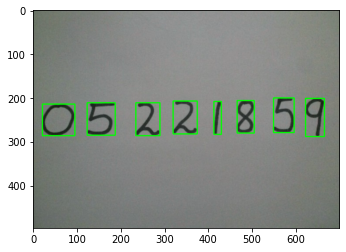

In [ ]:
import cv2
image = cv2.imread('/0_ru86ka5SAIxQ917T.jpeg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)




---------------------------------------


=========PREDICTION============ 




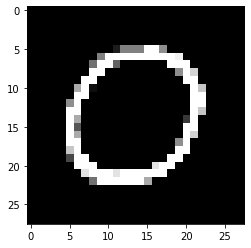



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




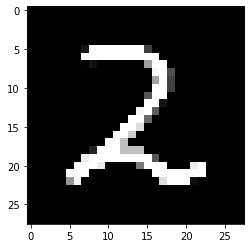



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




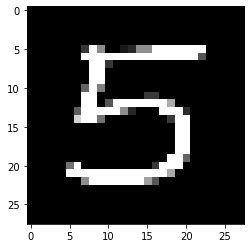



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




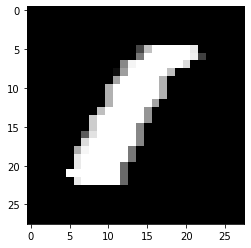



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




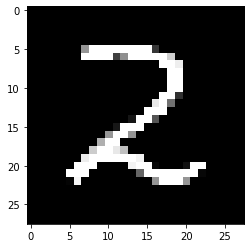



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




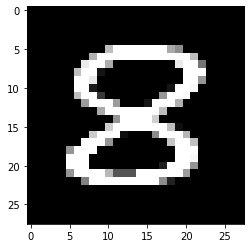



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




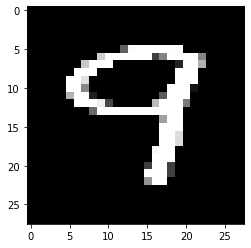



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




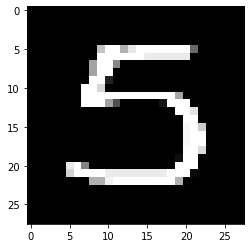



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [ ]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape( 1,28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")